In [5]:
import random
from pathlib import Path
from math import sqrt, pi

import numpy as np
import matplotlib.pyplot as plt
import cv2

from p_body_randomness.extract_sample_areas import extract_sample_area
from p_body_randomness.sampling import sample_pbodies
from p_body_randomness.centroids import extract_centroids
%matplotlib inline

In [11]:
# in the example data x is in [0,5], y=0, z=0
# we choose a set of 10 images to demonstrate our functions


TEMPLATE_PATH = '../data/input_data/20180606-SLP_Multiplexing_p1_C03_x00{x}_y000_z000_t000_{image_type}_Label{label}.png'
NUM_IMAGES = 10

image_types = {'pbodies': '13_Pbody_Segm', 'protein': '13_Succs', 'cellmask': 'segmentation', 'dapi': '2_DAPI'}

random.seed(42)

images = []
while len(images) < NUM_IMAGES:
    candidate = {'x': random.randint(0, 5), 'label': random.randint(0, 40)}
    if Path(TEMPLATE_PATH.format(**candidate, image_type=image_types['pbodies'])).is_file():
        images.append(candidate)
    


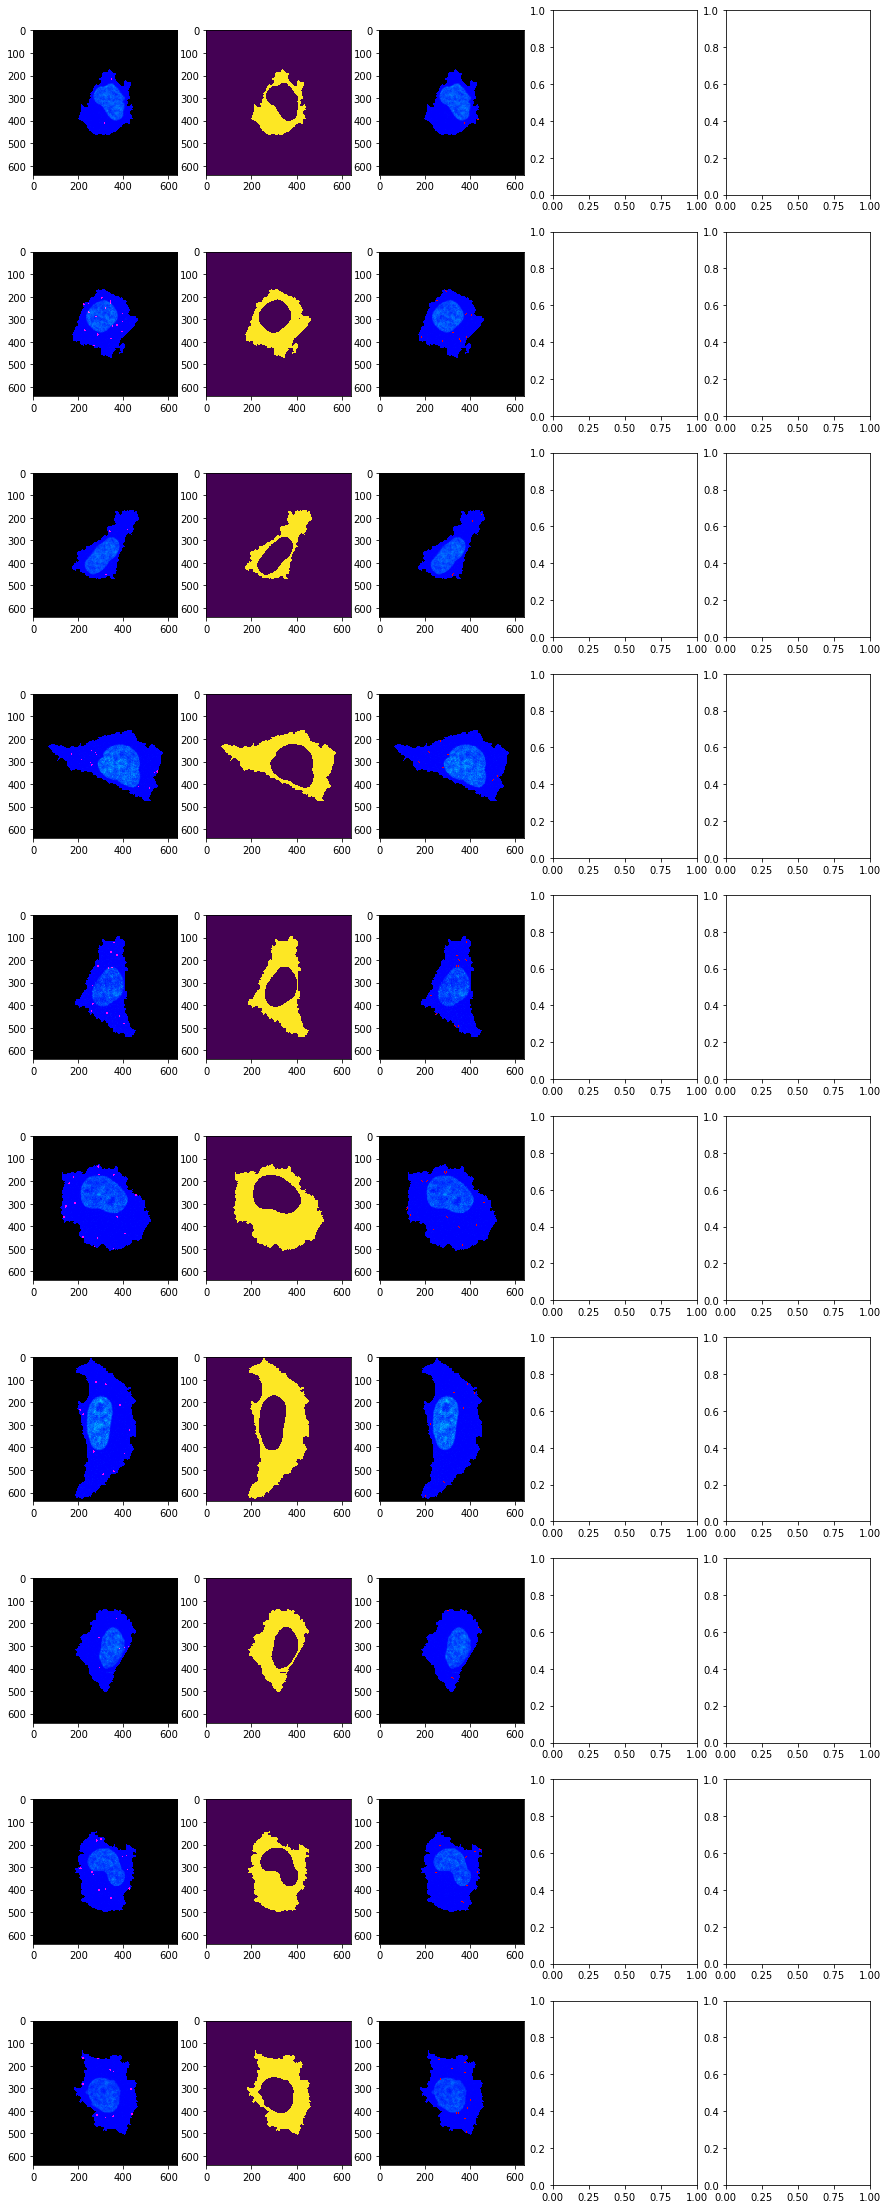

In [14]:
fig, axes = plt.subplots(ncols=5, nrows=NUM_IMAGES, figsize=(15, 40))

for i in range(NUM_IMAGES):
    # read raw channels
    pbodies_image = cv2.imread(TEMPLATE_PATH.format(**images[i], image_type=image_types['pbodies']), 0)
    dapi_image = cv2.imread(TEMPLATE_PATH.format(**images[i], image_type=image_types['dapi']), 0)
    cellmask_image = cv2.imread(TEMPLATE_PATH.format(**images[i], image_type=image_types['cellmask']), 0)
    
    # plot the available channels
    full_image = np.zeros((*pbodies_image.shape, 3), dtype=np.uint8)
    full_image[:, :, 0] = pbodies_image
    full_image[:, :, 1] = dapi_image
    full_image[:, :, 2] = cellmask_image
    axes[i, 0].imshow(full_image)
    
    centroids = extract_centroids(pbodies_image)
    # plot the sample area
    cytoplasmic_mask = extract_sample_area(cellmask_image, dapi_image)
    axes[i, 1].imshow(cytoplasmic_mask)

    # plot the sampled pbodies
    sampled_pbodies = sample_pbodies(cytoplasmic_mask, len(centroids), area_fn=lambda: 150)
    
    sampled_image = np.zeros((*pbodies_image.shape, 3), dtype=np.uint8)
    sampled_image[:, :, 1] = dapi_image
    sampled_image[:, :, 2] = cellmask_image
    
    for sampled_pbodie in sampled_pbodies:
        cv2.circle(sampled_image, (sampled_pbodie[0], sampled_pbodie[1]), int(sqrt(sampled_pbodie[2]/pi)), (255, 0, 0))

    axes[i, 2].imshow(sampled_image)
    
    # TODO now plot the distribution of real and simulated distances

In [ ]:
# connected jitterplot!

